In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
df = pd.read_csv("Student_Performance.csv")

In [30]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [32]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

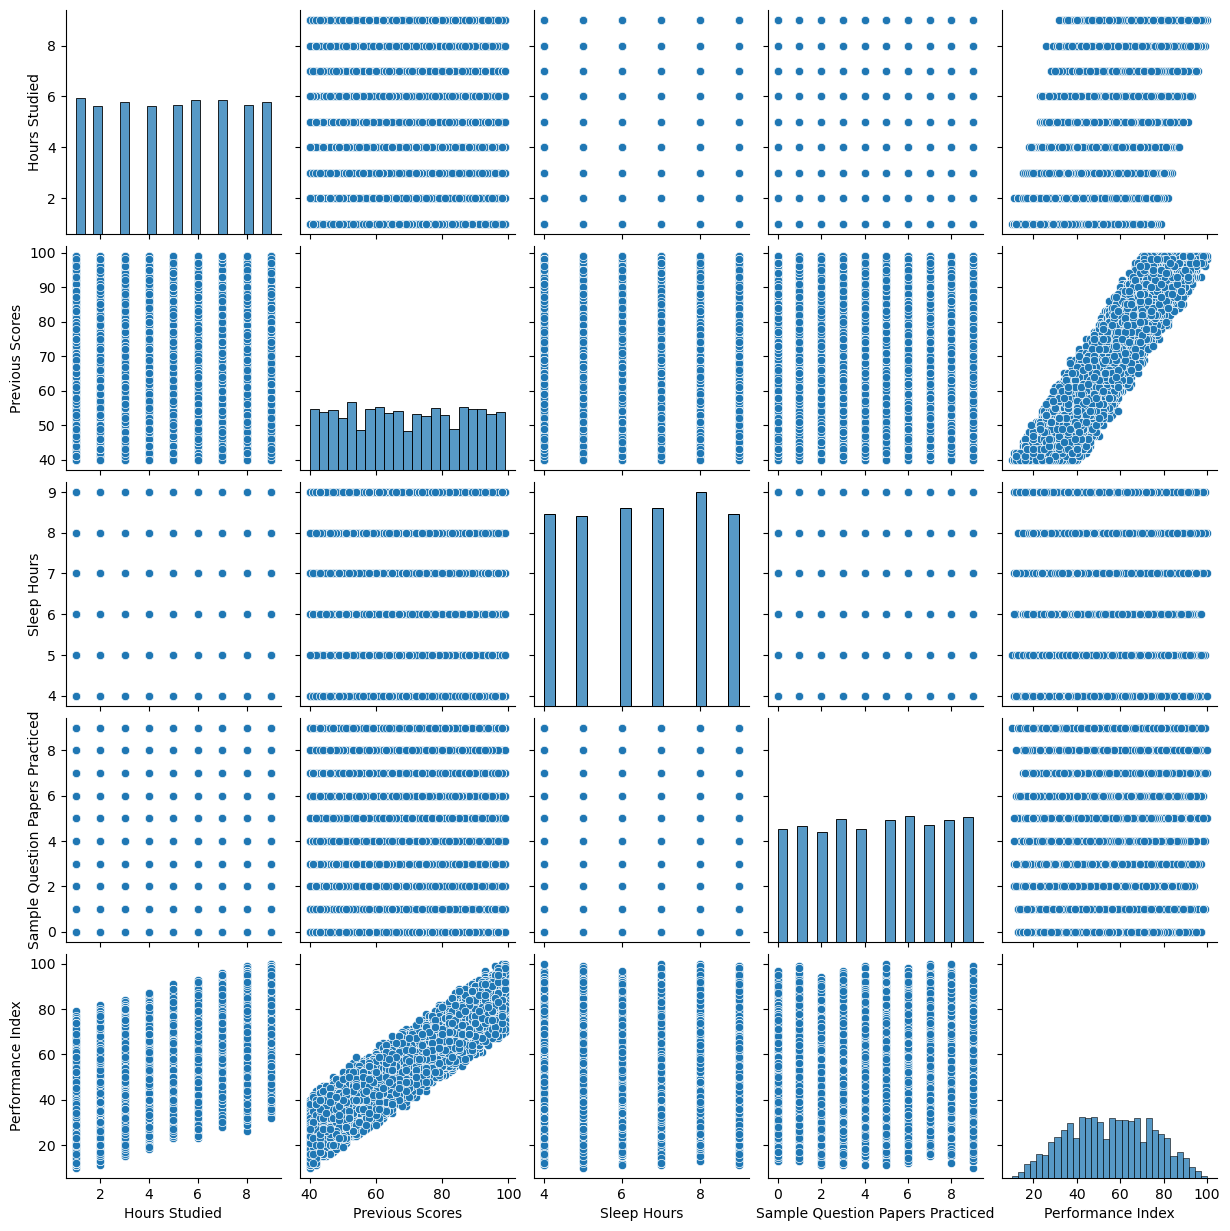

In [33]:
sns.pairplot(df)

In [34]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"Yes":1, "No":0})

In [35]:
X = df.drop("Performance Index", axis=1)
y = df["Performance Index"]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=15)

In [38]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
regressortree = DecisionTreeRegressor(criterion="squared_error", max_depth=3, random_state=0)

In [49]:
regressortree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [50]:
y_pred = regressortree.predict(X_test_scaled)

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [52]:
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

MAE:  5.107482798968231
MSE:  39.5337447865121
R2 Score:  0.8925115361152388


In [53]:
from sklearn.model_selection import GridSearchCV

In [56]:
params = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error","poisson"],
    "max_depth": [1,2,3,4,5,15,50,None],
    "splitter": ["best", "auto"]
}

In [64]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params, cv=5,scoring="neg_mean_squared_error")

In [65]:
import warnings
warnings.filterwarnings("ignore")

In [66]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 15, 50, None],
                         'splitter': ['best', 'auto']},
             scoring='neg_mean_squared_error')

In [67]:
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 15, 'splitter': 'best'}

In [68]:
y_pred = grid.predict(X_test_scaled)

In [69]:
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

MAE:  2.3957468253968255
MSE:  9.15277810468632
R2 Score:  0.9751144733679148


In [71]:
#KNN REGRESSOR

In [72]:
from sklearn.neighbors import KNeighborsRegressor

In [73]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [74]:
y_pred = knn_model.predict(X_test_scaled)

In [75]:
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

MAE:  2.4162666666666666
MSE:  9.22592
R2 Score:  0.974915607563136


In [76]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 20], 
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan'] 
}

In [77]:
knn_grid = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=knn_params, cv=5, scoring="neg_mean_squared_error")

In [78]:
knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 20],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [79]:
knn_grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'distance'}

In [80]:
y_pred = knn_grid.predict(X_test_scaled)

In [81]:
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

MAE:  2.1973678389464406
MSE:  7.797403443798416
R2 Score:  0.9787996071965945
